#### We can start visualising the data and making assumptions based on the data

##### For some of the visualisation we will be using cypher queries while we will be using python code for some.

Visualising the graph that we have. We can see that we have only one type of node which has only one type of relationship with other nodes of the same type

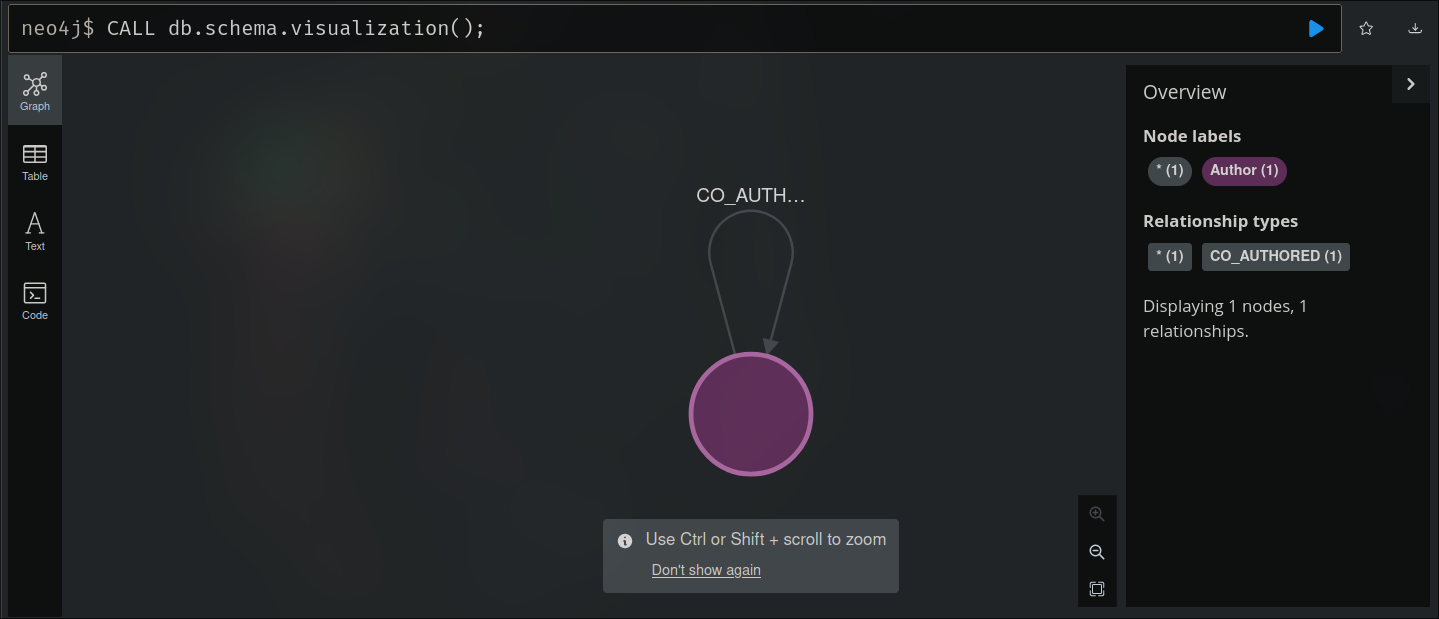

Importing all necessary libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

#### Reading all of the saved data for visualisation

In [ ]:
authors_df = pd.read_csv("../data/author_id.csv")
edges_df = pd.read_csv("../data/co_author_relation.csv")
features_df = pd.read_csv("../data/author_coauthor_features.csv")

We will visualize using a random subset of authors

In [ ]:
features_df.head()

- **Feature Subset Selection (`features_subset`):**
   - Selects a random subset of authors' features from the DataFrame `features_df`.
   - The subset size is specified as `n=50`.

- **Note:**
   - This code segment creates a visualization of feature values for a random subset of authors, providing insights into the distribution of features across authors.


In [ ]:
features_subset = features_df.sample(n=50)
plt.figure(figsize=(20,10))
for _,row in features_subset.iterrows():
    author_id = row['Author']
    # We remove the author id column as we have already considered it
    feature_values = row.values[1:]
    plt.plot(range(1,len(feature_values) + 1),feature_values,label=author_id,alpha=0.5)
    
plt.xlabel("Feature Index")
plt.ylabel("Feature Value")
plt.title("Author - Features Visualised")
plt.show()

In [ ]:
edges_df.head()

- **Graph Initialization (`G = nx.Graph()`):**
   - Initialize an undirected graph using NetworkX.

- **Network Visualization (`nx.draw(G,node_size=50,node_color="blue",alpha=0.5,edge_color="gray",with_labels=False)`):**
   - Use NetworkX's draw function to visualize the graph.
   - Set node size to 50, node color to blue with 0.5 alpha, and edge color to gray.
   - Turn off node labels with `with_labels=False`.
   - This code segment visualizes a co-authorship network where nodes represent authors and edges represent co-authorship relationships.


In [ ]:
G = nx.Graph()

for index,row in authors_df.iterrows():
    G.add_node(row["Author"],label="Author ID")

for index,row in edges_df.iterrows():
    G.add_edge(row["Author1"],row["Author1"])
    
plt.figure(figsize=(10,5))
nx.draw(G,node_size=50,node_color="blue",alpha=0.5,edge_color="gray",with_labels=False)
plt.title("Co-Authorship Network Visualisation")
plt.show()

#### Degree Distribution


- **Degree Calculation (`degrees = dict(G.degree())`):**
   - Calculate the degree of each node in the graph and store it in the `degrees` dictionary.

- **Histogram Visualization (`plt.hist(degrees.values(),bins=20)`):**
   - Create a histogram to visualize the distribution of degrees.
   - Use the values from the `degrees` dictionary as data.
   - Specify the number of bins as 20 for the histogram.
   - This code segment visualizes the distribution of node degrees in the co-authorship network, providing insights into the connectivity patterns among authors.



In [ ]:
degrees = dict(G.degree())
plt.hist(degrees.values(),bins=20)
plt.xlabel("Degree")
plt.ylabel("Number of Authors")
plt.title("Degree Distribution")
plt.show()

#### Community Detection

- **Community Detection (`communities = nx.algorithms.community.greedy_modularity_communities(G)`):**
   - Apply the greedy modularity algorithm to detect communities within the co-authorship network.
   - Store the detected communities in the `communities` list.

In [ ]:
communities = nx.algorithms.community.greedy_modularity_communities(G)
for i, community in enumerate(communities):
    print(f"Community {i + 1}: {community}")


#### Central Measures

- **Centrality Calculation (`degree_centralities = nx.degree_centrality(G)`, etc.):**
   - Calculate degree centrality, betweenness centrality, and closeness centrality for each node in the graph.
   - This code segment visualizes degree centrality against betweenness and closeness centrality values, providing insights into node importance in the co-authorship network.



In [ ]:
degree_centralities = nx.degree_centrality(G)
betweenness_centralities = nx.betweenness_centrality(G)
closeness_centralities = nx.closeness_centrality(G)

plt.figure(figsize=(8, 6))
plt.scatter(list(degree_centralities.values()), list(betweenness_centralities.values()), label="Betweenness")
plt.scatter(list(degree_centralities.values()), list(closeness_centralities.values()), label="Closeness")
plt.xlabel("Degree Centrality")
plt.ylabel("Centrality Measure Value")
plt.legend()
plt.title("Centrality Measures Visualization")
plt.show()